In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../Downloads/milk.csv", index_col = "date", parse_dates = ["date"])
df.head()

,pounds_per_cow
date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


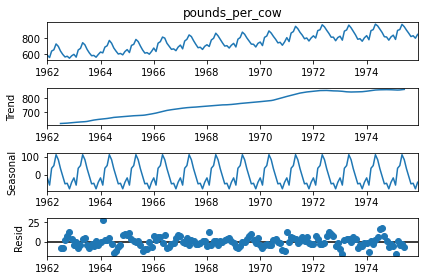

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df["pounds_per_cow"])
fig = decomp.plot()

In [8]:
from pmdarima import auto_arima

In [10]:
auto_arima = auto_arima(df, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1717.505, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1751.544, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1753.460, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1753.488, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1749.732, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1730.211, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1745.253, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1754.812, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1715.647, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1728.325, Time=0

In [11]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df, order = (2, 1, 5))
model_fit = model.fit()
model_fit.summary()

C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.pounds_per_cow   No. Observations:                  167
Model:                 ARIMA(2, 1, 5)   Log Likelihood                -822.537
Method:                       css-mle   S.D. of innovations             32.346
Date:                Mon, 05 Jul 2021   AIC                           1663.074
Time:                        15:01:12   BIC                           1691.136
Sample:                    02-01-1962   HQIC                          1674.464
                         - 12-01-1975                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.6853      0.149     11.314      0.000       1.393       1.977
ar.L1.D.pounds_per_cow    -1.4458      0.080    -18.110      0.000      -1.602      -1.289
ar.L2.D.pounds_per_cow    -0.6771      0.089     -7.634      0.000      -0.851      -0.503
ma.L1.D.pounds_per_cow     1.3721      0.078     17.544      0.000       1.219       1.525
ma.L2.D.pounds_per_cow     0.4213      0.084      5.004      0.000       0.256       0.586
ma.L3.D.pounds_per_cow    -0.6284      0.091     -6.916      0.000      -0.806      -0.450
ma.L4.D.pounds_per_cow    -1.2867      0.081    -15.960      0.000      -1.445      -1.129
ma.L5.D.pounds_per_cow    -0.8783      0.046    -19.152      0.000      -0.968      -0.788
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0676           -0.5806j            1.2153           -0.4207
AR.2           -1.0676           +0.5806j            1.2153            0.4207
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.2717           -1.0215j            1.0570           -0.2914
MA.3           -0.2717           +1.0215j            1.0570            0.2914
MA.4           -0.9609           -0.3095j            1.0095           -0.4504
MA.5           -0.9609           +0.3095j            1.0095            0.4504
-----------------------------------------------------------------------------
"""

In [12]:
ypred = model_fit.predict()

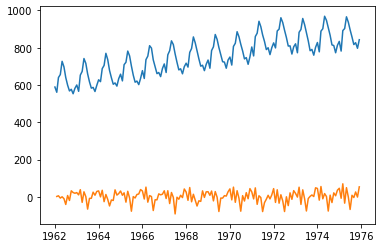

In [13]:
plt.plot(df)
plt.plot(ypred)

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
def checkParamerters(params):
    result = pd.DataFrame(columns = ["Parameter", "AIC"])
    par = []
    maic = []
    for i in params:
        try:
            model = SARIMAX(df, order = (i[0], d, i[1]),seasonal_order = (i[2], D, i[3], m)).fit(disp=0)
            par.append(i)
            maic = model.aic
        except:
            continue
        par.append(i)
        maic = model.aic
    result["Parameter"] = par
    result["AIC"] = maic
    return result

In [34]:
from itertools import product
p = range(0, 2, 1)
d = 1
q = range(0, 2, 1)
P = range(0, 2, 1)
D = 1
Q = range(0, 2, 1)
m = 12
pr = product(p, q, P, Q)


In [35]:
checkParamerters(pr)

C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

,Parameter,AIC
0,"(0, 0, 0, 0)",1069.774825
1,"(0, 0, 0, 0)",1069.774825
2,"(0, 0, 0, 1)",1069.774825
3,"(0, 0, 0, 1)",1069.774825
4,"(0, 0, 1, 0)",1069.774825
5,"(0, 0, 1, 0)",1069.774825
6,"(0, 0, 1, 1)",1069.774825
7,"(0, 0, 1, 1)",1069.774825
8,"(0, 1, 0, 0)",1069.774825
9,"(0, 1, 0, 0)",1069.774825
